### Time Series

 - Every time series has few components which are as follows
  - **Trend**
  - **seasonality**
  - **cyclic**
 - **Hodrick - Prescott** filter
 - **ETS models (error - trend - seasonality)**
  - ETS decomposition

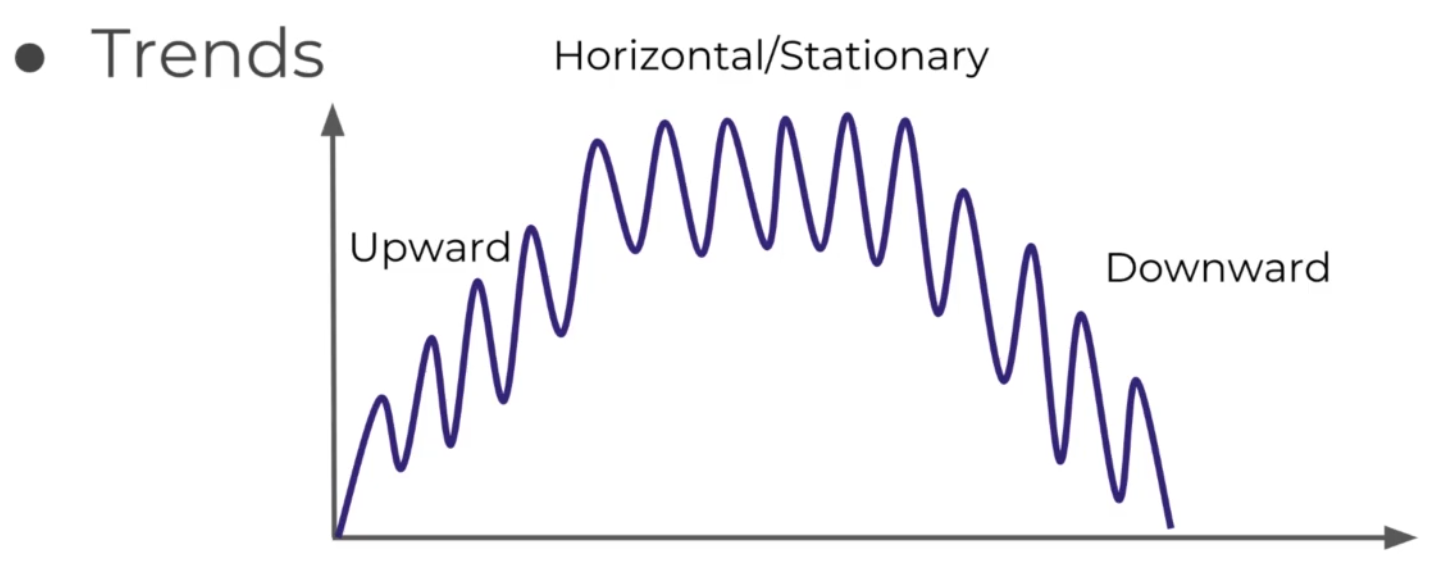

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open("trends.png")
image

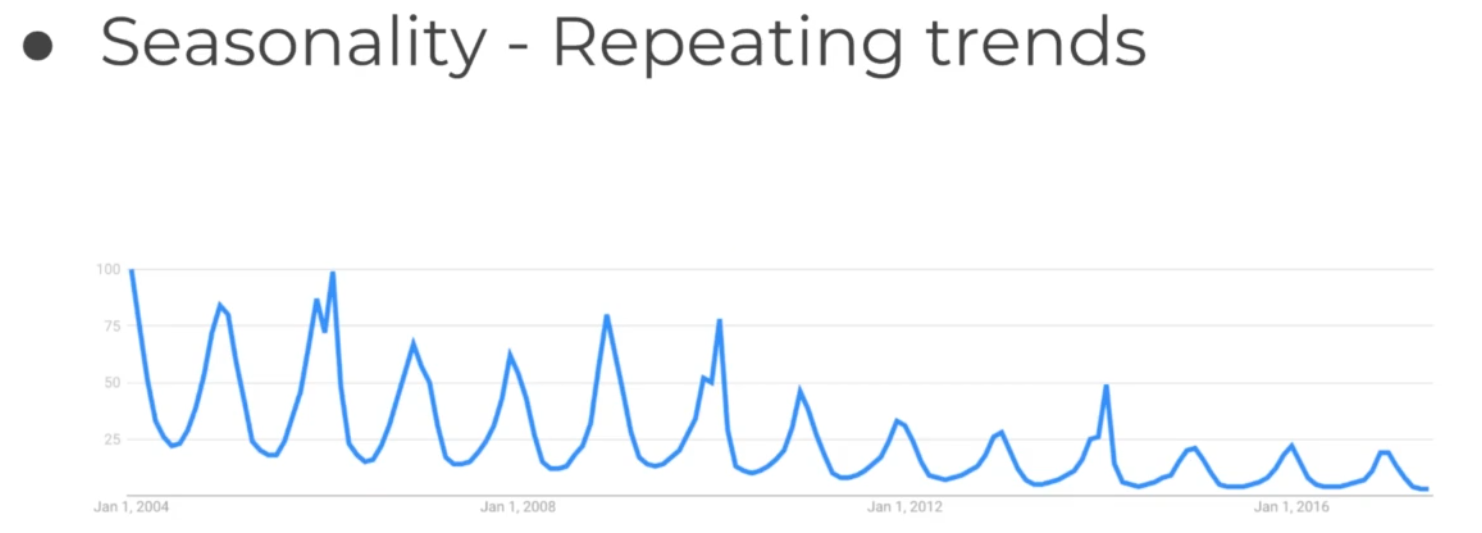

In [8]:
image = Image.open("seasonality.png")
image

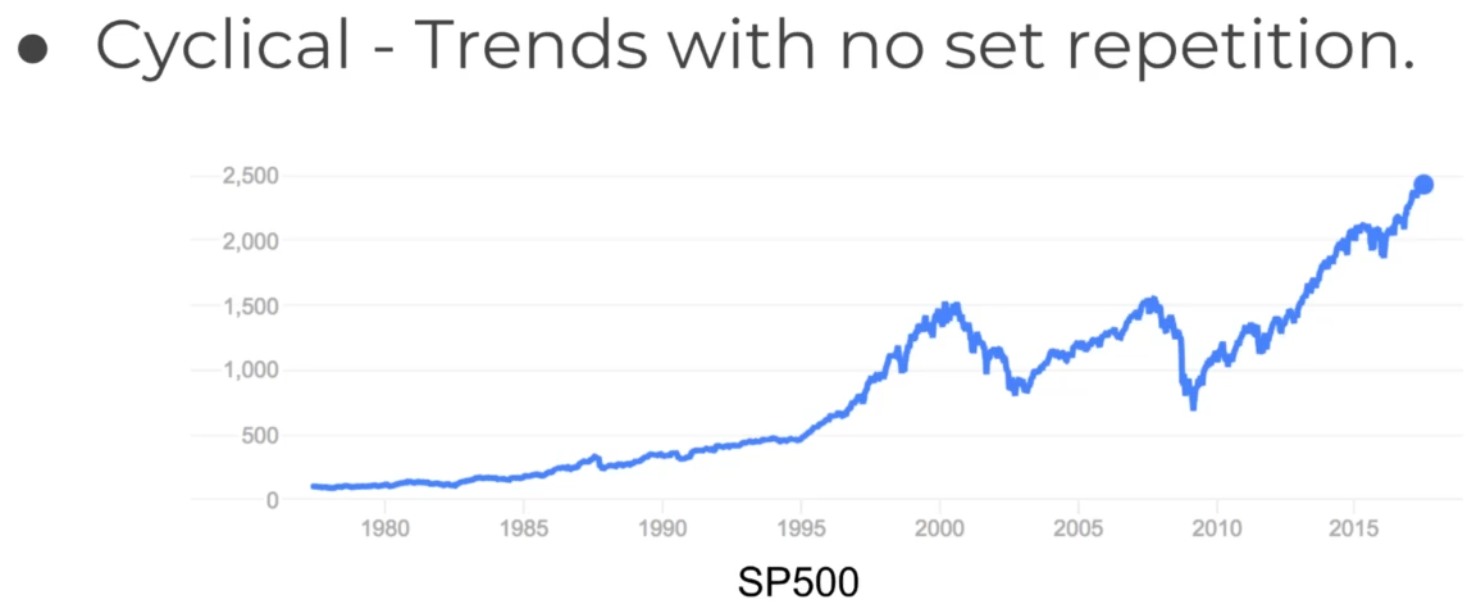

In [9]:
image = Image.open("cyclic.png")
image

In [27]:
import pandas as pd
import numpy as np
import cufflinks as cf
from IPython.display import display,HTML
%matplotlib inline
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [12]:
df = pd.read_csv('data/macrodata.csv', index_col= 0, parse_dates= True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [24]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [13]:
df.isna().sum()

year        0
quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
dtype: int64

In [30]:
# lets plot realgdp
df['realgdp'].iplot(kind = 'line',title = 'realgdp' )

- How to see trend and cyclic component from the graph using statmodels **(Hodrick - Prescott filter)**

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [32]:
# we have quarterly data so we can keep lambda = 1600 as default
gdp_trend, gdp_cycle = hpfilter(df['realgdp'], lamb= 1600)
plt.style.use('seaborn')
gdp_trend.iplot(kind = 'line', title = 'trend')
gdp_cycle.iplot(kind = 'line', title = 'cyclic')

In [35]:
df['gdp_trend'] = gdp_trend
df['gdp_cyclic'] = gdp_cycle

In [37]:
df[['gdp_trend', 'gdp_cyclic']].iplot(kind = 'line')

In [49]:
df[['gdp_trend', 'realgdp']].iplot(kind = 'line', title = 'realgdp vs trend')

In [50]:
df[['gdp_cyclic', 'realgdp']].iplot(kind = 'line', title = 'realgdp vs cyclic')

In [52]:
# ETS decomposition
df = pd.read_csv('data/airline_passengers.csv', index_col= 'Month', parse_dates= True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [53]:
df.iplot(kind = 'line', title = 'air passengers')

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
# from the above plot it is clear that the passengers plot keep on increasing and upword trend so will use "multiplicative"
result = seasonal_decompose(df['Thousands of Passengers'], model= 'multiplicative')

In [59]:
# ypu can check the trend, seasonality and error components
result.seasonal[0:10]

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
Name: seasonal, dtype: float64

In [60]:
result.trend[0:10]

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64

In [61]:
result.resid[0:10]

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: resid, dtype: float64

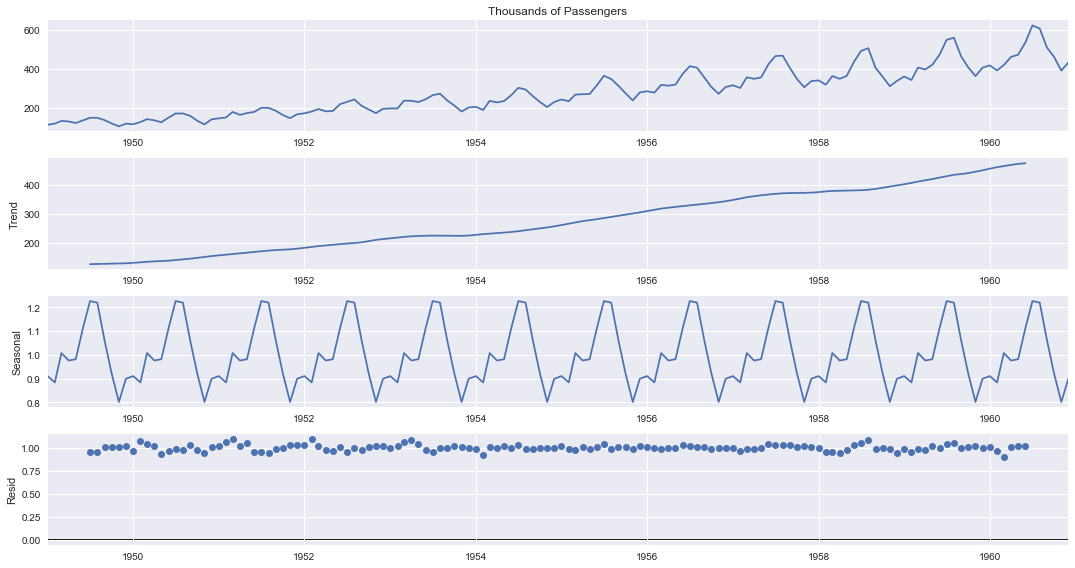

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

result.plot(); # use semicolon or else the plot will show 2 times